In [2]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys
from IPython.display import display, clear_output

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
sns.set_theme("paper", "whitegrid")
"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

from stock_simulation_study.stock_environment import StockEnvironment, StockEnvironmentTwo
from stock_simulation_study.stock_agent import RLStockAgent
#==============
from stock_simulation_study.reinforce import REINFORCE_Agent
import time
#==============

import codelib  # used for extending pandas

from codelib.plotting import DefaultStyle, fan_chart
DefaultStyle()

"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
aapl_prices = ffn.get('spy', start = '2010-01-01', end = '2020-01-01')

In [4]:
plt.plot(aapl_prices)

In [5]:
def position_plot(actions, price, title, savefig = "", ylab = ""):
    annotation = pd.DataFrame(actions.values, columns = {"pos"})
    to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                            'pos': [-2, -1, 0, 1, 2]})
    c = annotation.merge(to_join, on='pos', how='left')["col_map"]
    x = np.linspace(0, len(price), len(price)+1)
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], price[:-1], x[1:], price[1:])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

    fig, ax = plt.subplots(1,figsize=(8, 8))
    fig.tight_layout()
    ax.add_collection(colored_lines)
    ax.autoscale_view()
    plt.title(title)
    plt.xlabel("timestep")
    plt.ylabel(ylab)
    if savefig != "":
        plt.savefig(savefig)
    plt.show()
    


def color_plot(color_vals, y_vals, title, savefig = ""):
#     x = np.linspace(0, 3 * np.pi, 500)
#     y = np.sin(x)
#     dydx = np.cos(0.5 * (x[:-1] + x[1:]))
    x = np.linspace(0, len(y_vals), len(y_vals))
    y = y_vals
    dydx = color_vals
    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    fig, axs = plt.subplots(1, figsize=(8, 8))
    fig.tight_layout()
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(dydx.min(), dydx.max())
    cmap = cm.RdYlGn
    lc = LineCollection(segments, cmap=cmap, norm=colors.CenteredNorm())
    # Set the values used for colormapping
    lc.set_array(dydx)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    fig.colorbar(line, ax=axs)

    #axs.set_xlim(x.min(), x.max())
    #axs.set_ylim(dydx.min(), dydx.max()+1)
    axs.autoscale_view()
    plt.title(title)
    plt.xlabel("timestep")
    plt.ylabel("price")
    if savefig != "":
        plt.savefig(savefig)
    plt.show()


# REINFORCE AGENT ON SIMULATED DATA

In [38]:
# n_time_points = int(250*2.5)
# N_EPISODES = 100
# nstocks = 1
# lag = 1
# env = StockEnvironmentTwo(prices = aapl_prices, n_time_points = n_time_points, 
#                           price_type = "sim_prices", kappa = 0.00001,
#                          trade_cost = 0.0001)
# global env

# agent = REINFORCE_Agent(state_size=11,
#                         action_size=5,
#                         discount_rate=0.99,
#                         epsilon = 0.1,
#                         n_hidden_layers=4, 
#                         hidden_layer_size=512,
#                         learning_rate=0.000001,
#                         mu_zero = False,
#                         dropout = 0.1,
#                         reg_penalty = 1e-4,
#                         bias_reg = 1e-4
#                        )

Iteration:      1,   Func. Count:      9,   Neg. LLF: 75555.69685466804
Iteration:      2,   Func. Count:     22,   Neg. LLF: 127126.9602797863
Iteration:      3,   Func. Count:     33,   Neg. LLF: 111796.26215409348
Iteration:      4,   Func. Count:     43,   Neg. LLF: 69562.18688174381
Iteration:      5,   Func. Count:     52,   Neg. LLF: 4100.074958715287
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4848.301519052238
Iteration:      7,   Func. Count:     70,   Neg. LLF: 7774.657615592037
Iteration:      8,   Func. Count:     80,   Neg. LLF: 2894.8598054235317
Iteration:      9,   Func. Count:     89,   Neg. LLF: 66962.40752887083
Iteration:     10,   Func. Count:     99,   Neg. LLF: 2892.9469447650245
Iteration:     11,   Func. Count:    107,   Neg. LLF: 2892.9426435163123
Iteration:     12,   Func. Count:    115,   Neg. LLF: 2892.9420749141455
Iteration:     13,   Func. Count:    123,   Neg. LLF: 2892.9420435800594
Iteration:     14,   Func. Count:    130,   Neg. LLF: 2892

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


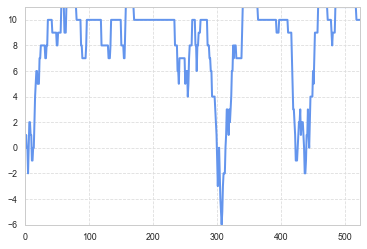

0     25
1     37
2    400
3     29
4     34
Name: 1, dtype: int64
DIFF:  0.0
ACT REW 6.264889639427317
REW:  6.0871825180896755


KeyboardInterrupt: 

In [10]:
# agent.epsilon = 0.8
# N_EPISODES = 11000
# start_time = time.time()
# print("Start: %s" % (time.strftime("%H:%M:%S")))
# final_results = pd.DataFrame({0: [1], 1: [1], 2: [1], 3: [1], 4: [1]})
# action_episodes = pd.DataFrame()
# prices_episodes = pd.DataFrame()
# return_episodes = pd.DataFrame()
# position_size_episodes = pd.DataFrame()
# all_return_episodes = pd.DataFrame()
# for e in range(N_EPISODES):
#     agent.run_episode(env=env)
#     agent.score_episode(e, N_EPISODES)
    
#     if e % 100 == 0:
        
#         clear_output()
#         prices = np.cumprod(np.array(agent.state_memory)[:,-1] + 1)
#         position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = prices,
#              title = "action vs. price")
#         position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,-1],
#              title = "action vs. price change")
#         color_plot(color_vals = np.array(agent.state_memory)[:,0], y_vals = prices,
#              title = "Positions size vs. Price")
#         plt.plot(np.array(agent.state_memory)[:,0])
#         plt.show()
#         unique, counts = np.unique(agent.action_memory, return_counts=True)
#         results = pd.DataFrame(np.column_stack((unique, counts)).T)
#         final_results = final_results.append(results.iloc[1])
#         print(results.iloc[1])
#         try:
#             print("DIFF: ", np.sum(results.iloc[1] * np.array([-2,-1,0,1,2])) - pd.DataFrame(agent.state_memory).iloc[-1,0])
#         except:
#             pass
#         print("ACT REW", np.sum(np.array(agent.state_memory)[:,0] * np.array(agent.state_memory)[:,-1]))
#         print("REW: ", agent.results[-1])
# #     if e and (e+1) % agent.save_interval == 0:
# #         agent.save()

#     all_return_episodes = pd.concat([all_return_episodes, pd.DataFrame(agent.state_memory).iloc[:,0] * 
#                                      pd.DataFrame(agent.state_memory).iloc[:,1]], axis = 1)
    
#     if any(np.array([50, 100, 250, 500, 1000, 2000, 5000, 9999])+100-e == 0):
#         prices = np.cumprod(np.array(agent.state_memory)[:,-1] + 1)
#         action_episodes = pd.concat([action_episodes, pd.DataFrame(agent.action_memory)- 2], axis = 1)
#         prices_episodes = pd.concat([prices_episodes, pd.DataFrame(prices)], axis = 1)
#         return_episodes = pd.concat([return_episodes, pd.DataFrame(agent.state_memory).iloc[:,1]], axis = 1)
#         position_size_episodes = pd.concat([position_size_episodes, pd.DataFrame(agent.state_memory).iloc[:,0]], axis = 1)
#     if e > 99:
#         #agent.epsilon = np.maximum(np.exp(-e / 20), 0.01) 
#         agent.epsilon = 0.01
# elapsed_time = time.time() - start_time
# print("\nTrain time: ", elapsed_time)

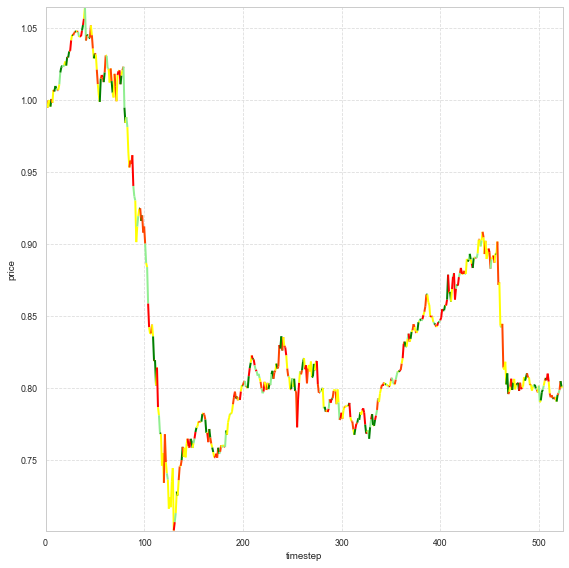

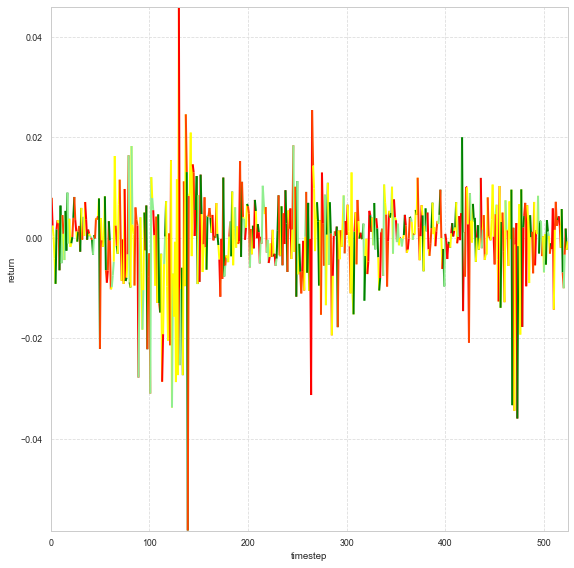

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


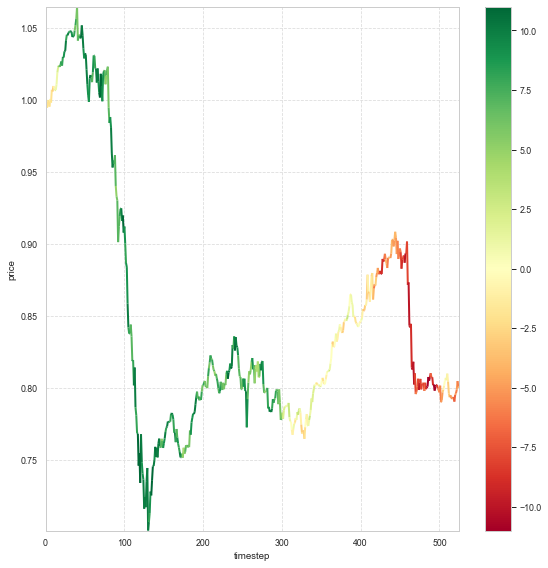

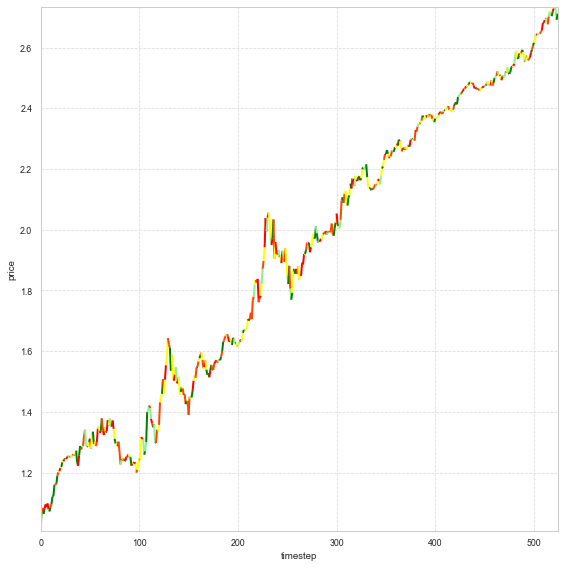

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


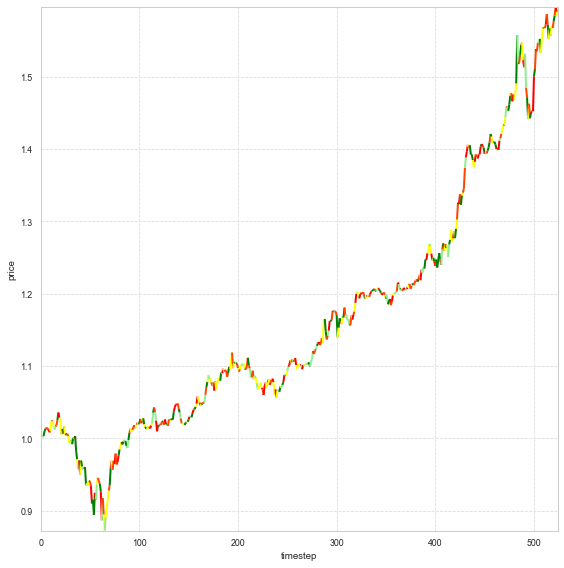

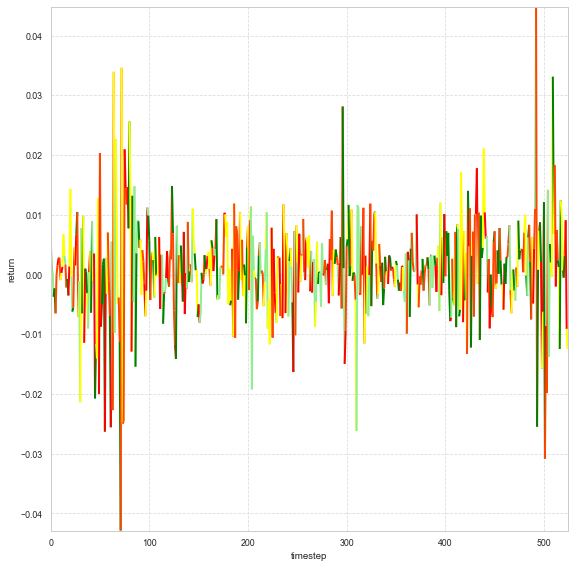

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


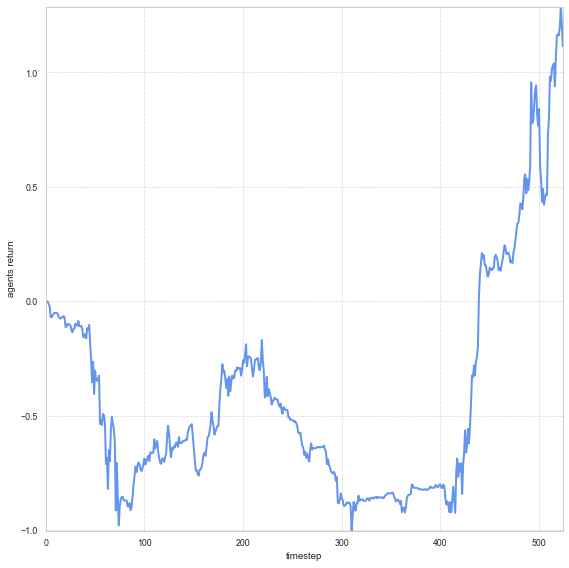

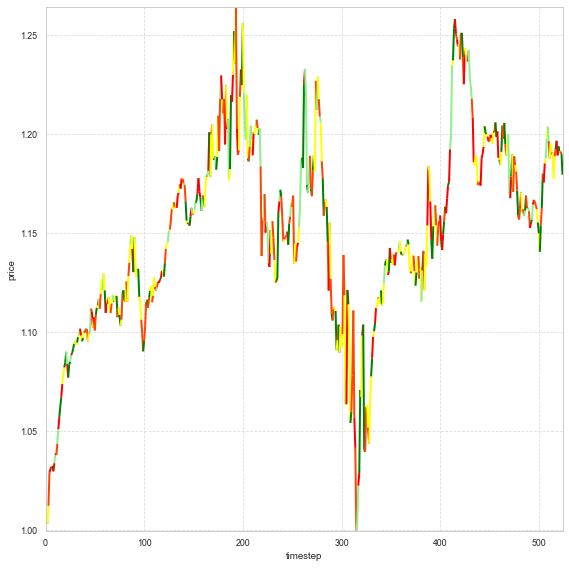

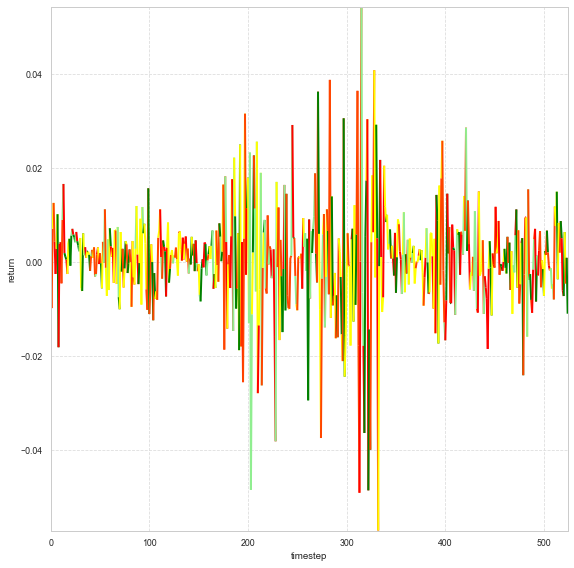

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


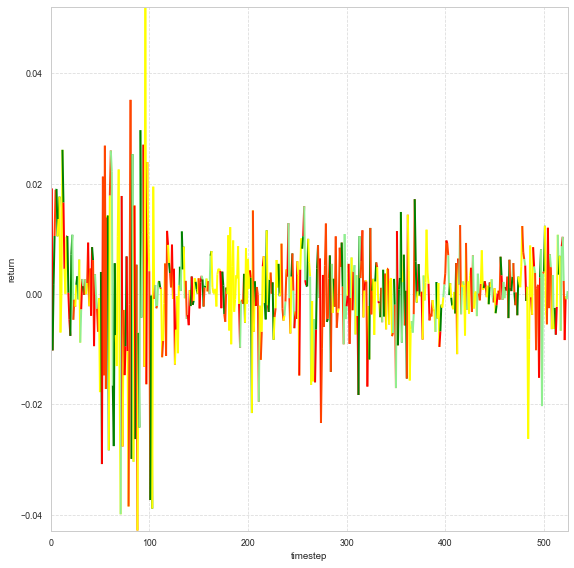

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


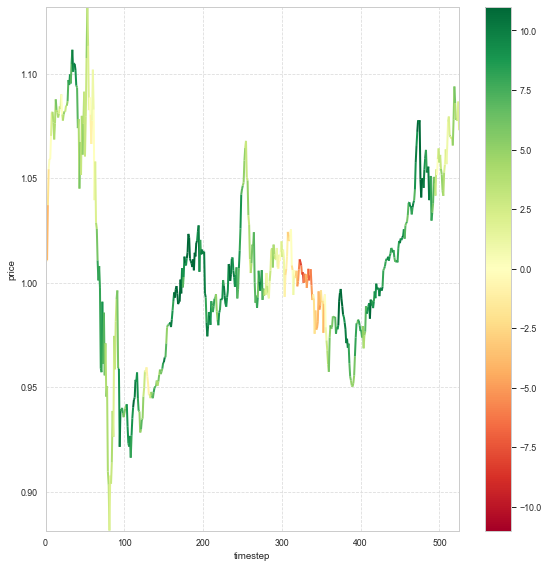

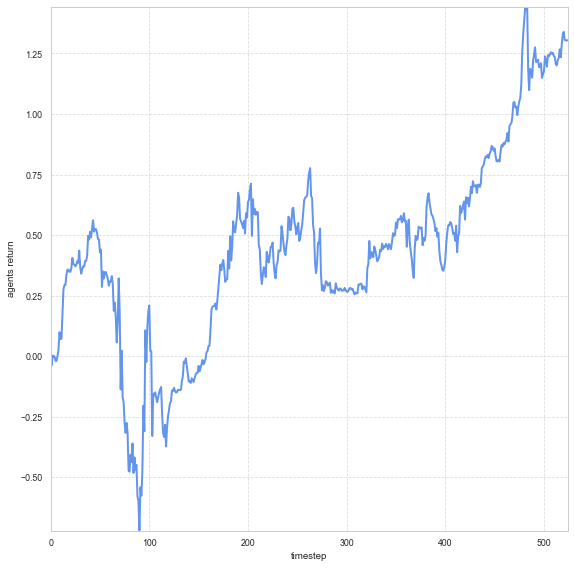

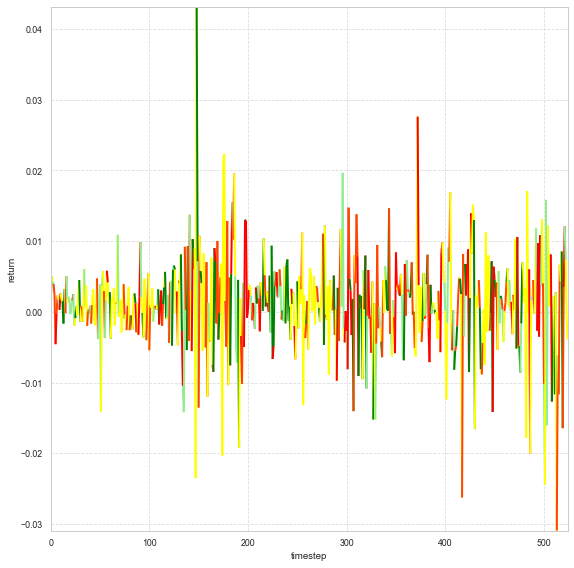

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


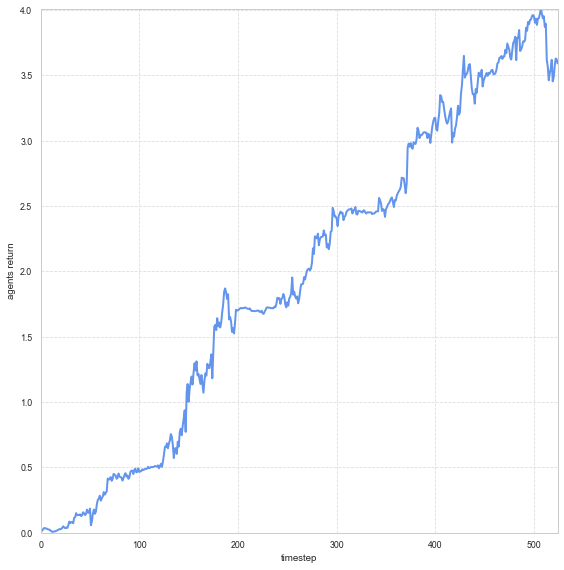

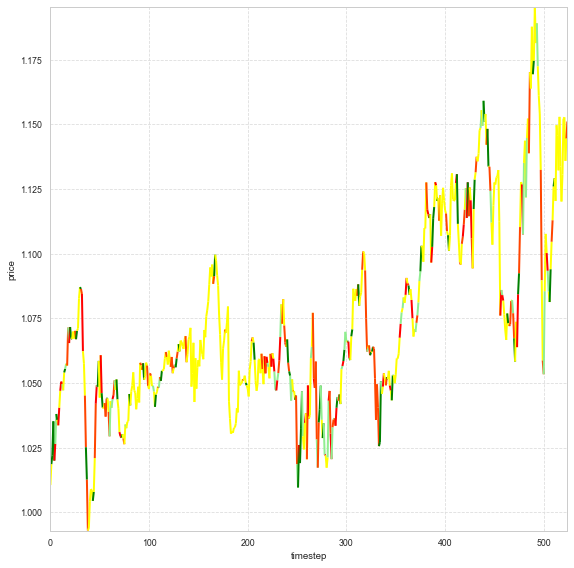

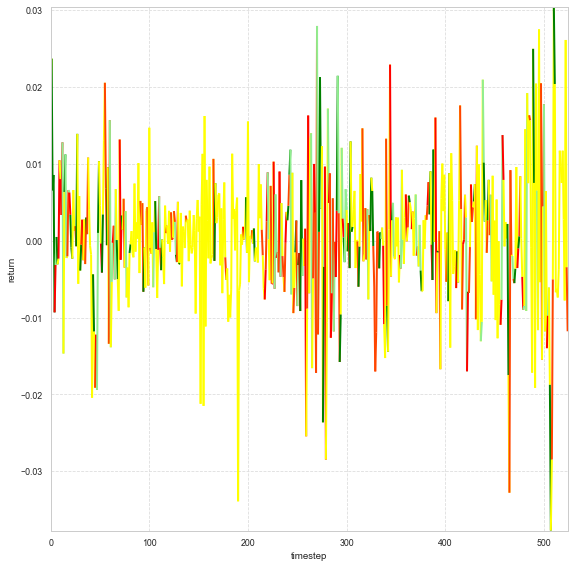

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


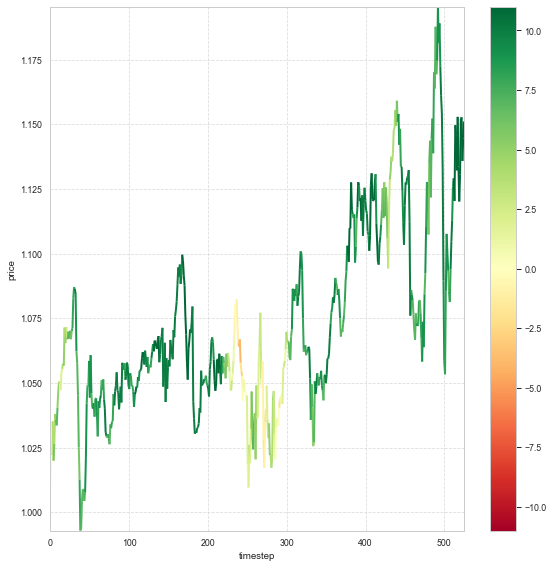

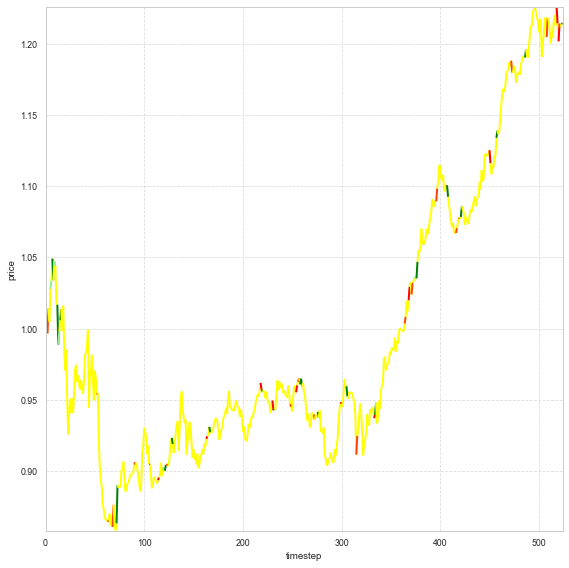

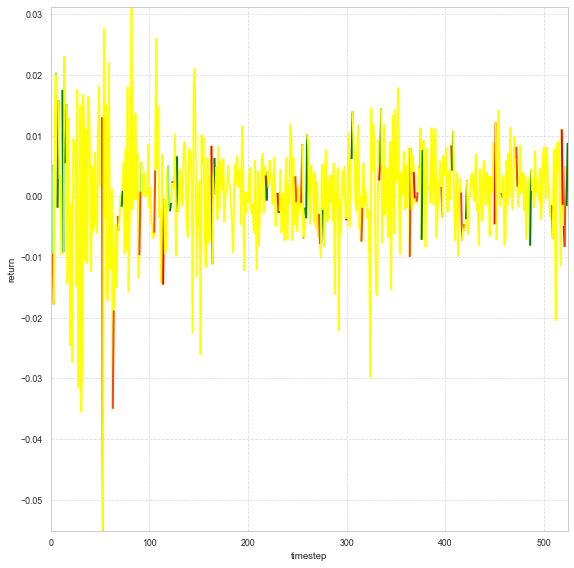

C:\Users\lucas\AppData\Local\Temp\ipykernel_17744\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


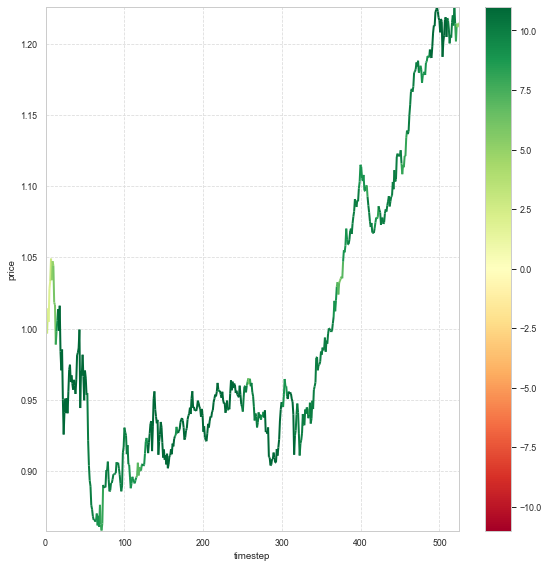

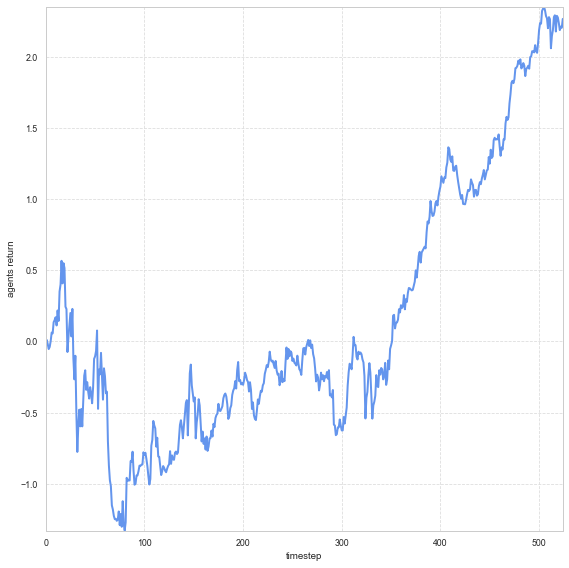

In [11]:
# episode_list = [50, 100, 250, 500, 1000, 2000, 5000, 10000]
# for i in range(len(episode_list)):
#     position_plot(actions = action_episodes.iloc[:,i], price = prices_episodes.iloc[:,i],
#          title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_act_price_plot.png", ylab = "price")
#     position_plot(actions = action_episodes.iloc[:,i], price = return_episodes.iloc[:,i],
#          title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_act_return_plot.png", ylab = "return")
#     color_plot(color_vals = position_size_episodes.iloc[:,i], y_vals = prices_episodes.iloc[:,i],
#          title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_pos_plot.png")
#     agent_returns = np.cumsum(position_size_episodes.iloc[:,i] * return_episodes.iloc[:,i])
    
#     fig, axs = plt.subplots(1, figsize=(8, 8))
#     fig.tight_layout()
#     plt.plot(agent_returns)
#     plt.xlabel("timestep")
#     plt.ylabel("agents return")
#     plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_agent_return.png", bbox_inches='tight')

# REINFORCE AGENT ON RAW DATA

In [15]:
n_time_points = int(250*2.5)
#N_EPISODES = 100
nstocks = 1
lag = 1
env = StockEnvironmentTwo(prices = aapl_prices, n_time_points = n_time_points, 
                          price_type = "test_prices", kappa = 0.00001,
                         trade_cost = 0.000001)
global env

agent_raw_data = REINFORCE_Agent(state_size=11,
                        action_size=5,
                        discount_rate=0.99,
                        epsilon = 0.1,
                        n_hidden_layers=4, 
                        hidden_layer_size=512,
                        learning_rate=0.0000001,
                        mu_zero = False,
                        dropout = 0.1,
                        reg_penalty = 1e-4,
                        bias_reg = 1e-4
                       )

Iteration:      1,   Func. Count:      9,   Neg. LLF: 78193.74407956479
Iteration:      2,   Func. Count:     22,   Neg. LLF: 131797.87350645618
Iteration:      3,   Func. Count:     33,   Neg. LLF: 111781.59566588383
Iteration:      4,   Func. Count:     43,   Neg. LLF: 55930.3782718641
Iteration:      5,   Func. Count:     52,   Neg. LLF: 4098.588446844307
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4848.399686491473
Iteration:      7,   Func. Count:     70,   Neg. LLF: 7769.871882933645
Iteration:      8,   Func. Count:     80,   Neg. LLF: 2894.86228873159
Iteration:      9,   Func. Count:     89,   Neg. LLF: 114064.57148182573
Iteration:     10,   Func. Count:     99,   Neg. LLF: 2892.9485210545295
Iteration:     11,   Func. Count:    107,   Neg. LLF: 2892.94422987067
Iteration:     12,   Func. Count:    115,   Neg. LLF: 2892.9436637562394
Iteration:     13,   Func. Count:    123,   Neg. LLF: 2892.9436315915973
Iteration:     14,   Func. Count:    130,   Neg. LLF: 2892.94

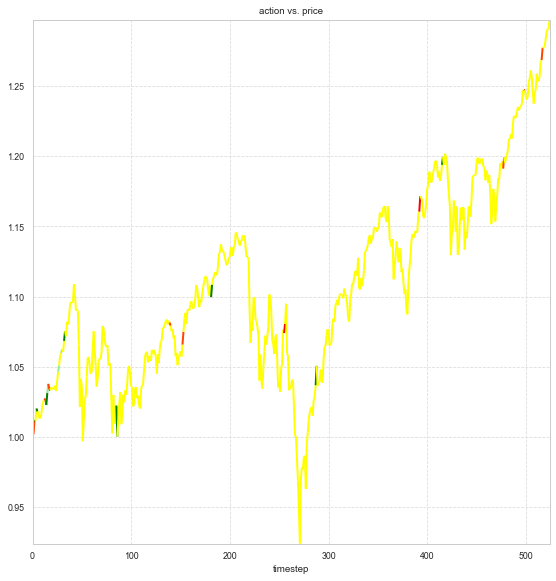

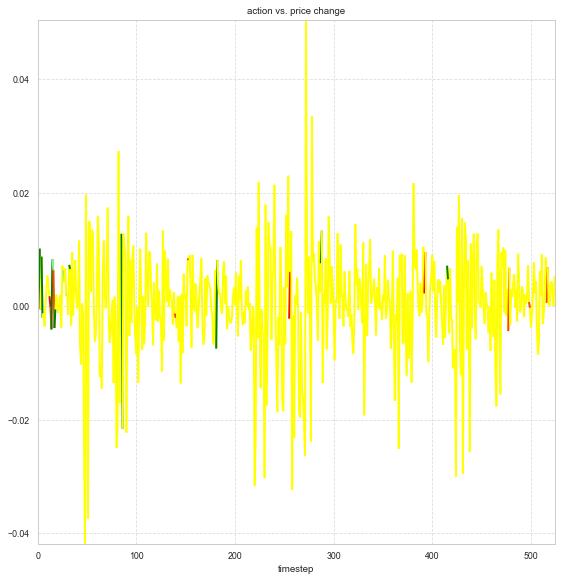

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


0      3
1      8
2    500
3      4
4     10
Name: 1, dtype: int64
DIFF:  2.0
ACT REW 2.5387629619191157
REW:  2.4862294334869177


KeyboardInterrupt: 

In [16]:
agent_raw_data.epsilon = 0.8
N_EPISODES = 50000
start_time = time.time()
print("Start: %s" % (time.strftime("%H:%M:%S")))
final_results = pd.DataFrame({0: [1], 1: [1], 2: [1], 3: [1], 4: [1]})
action_episodes = pd.DataFrame()
prices_episodes = pd.DataFrame()
return_episodes = pd.DataFrame()
position_size_episodes = pd.DataFrame()
all_return_episodes = pd.DataFrame()
for e in range(N_EPISODES):
    agent_raw_data.run_episode(env=env)
    agent_raw_data.score_episode(e, N_EPISODES)
    
    if e % 100 == 0:
        
        clear_output()
        prices = np.cumprod(np.array(agent_raw_data.state_memory)[:,-1] + 1)
        position_plot(actions = pd.DataFrame(agent_raw_data.action_memory)- 2, price = prices,
             title = "action vs. price")
        position_plot(actions = pd.DataFrame(agent_raw_data.action_memory)- 2, 
                      price = np.array(agent_raw_data.state_memory)[:,-1], title = "action vs. price change")
        color_plot(color_vals = np.array(agent_raw_data.state_memory)[:,0], y_vals = prices,
             title = "Positions size vs. Price")
        plt.plot(np.array(agent_raw_data.state_memory)[:,0])
        plt.show()
        unique, counts = np.unique(agent_raw_data.action_memory, return_counts=True)
        results = pd.DataFrame(np.column_stack((unique, counts)).T)
        final_results = final_results.append(results.iloc[1])
        print(results.iloc[1])
        try:
            print("DIFF: ", np.sum(results.iloc[1] * np.array([-2,-1,0,1,2])) - pd.DataFrame(agent_raw_data.state_memory).iloc[-1,0])
        except:
            pass
        print("ACT REW", np.sum(np.array(agent_raw_data.state_memory)[:,0] * np.array(agent_raw_data.state_memory)[:,-1]))
        print("REW: ", agent_raw_data.results[-1])
#     if e and (e+1) % agent.save_interval == 0:
#         agent.save()

    all_return_episodes = pd.concat([all_return_episodes, pd.DataFrame(agent_raw_data.state_memory).iloc[:,0] * 
                                     pd.DataFrame(agent_raw_data.state_memory).iloc[:,1]], axis = 1)
    
    if any(np.array([50, 100, 250, 500, 1000, 2000, 5000, 9999])+100-e == 0):
        prices = np.cumprod(np.array(agent_raw_data.state_memory)[:,-1] + 1)
        action_episodes = pd.concat([action_episodes, pd.DataFrame(agent_raw_data.action_memory)- 2], axis = 1)
        prices_episodes = pd.concat([prices_episodes, pd.DataFrame(prices)], axis = 1)
        return_episodes = pd.concat([return_episodes, pd.DataFrame(agent_raw_data.state_memory).iloc[:,1]], axis = 1)
        position_size_episodes = pd.concat([position_size_episodes, pd.DataFrame(agent_raw_data.state_memory).iloc[:,0]], axis = 1)
    if e > 99:
        #agent.epsilon = np.maximum(np.exp(-e / 20), 0.01) 
        agent_raw_data.epsilon = 0.01
elapsed_time = time.time() - start_time
print("\nTrain time: ", elapsed_time)

## SAVE PLOTS


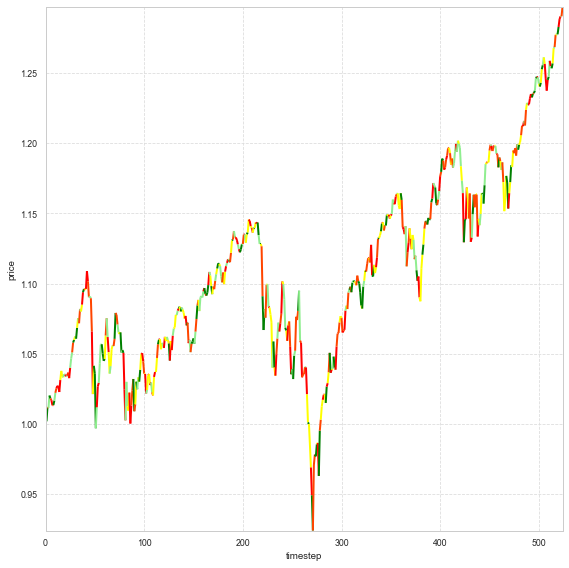

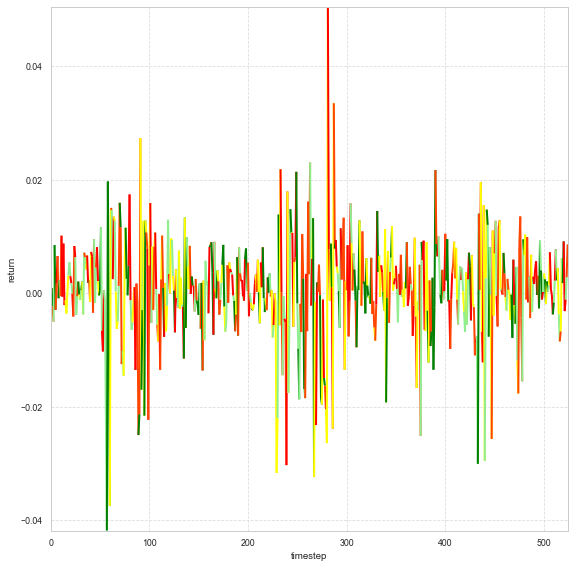

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


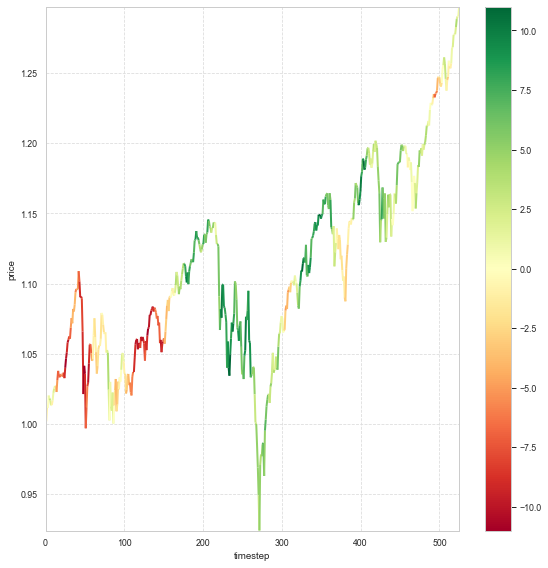

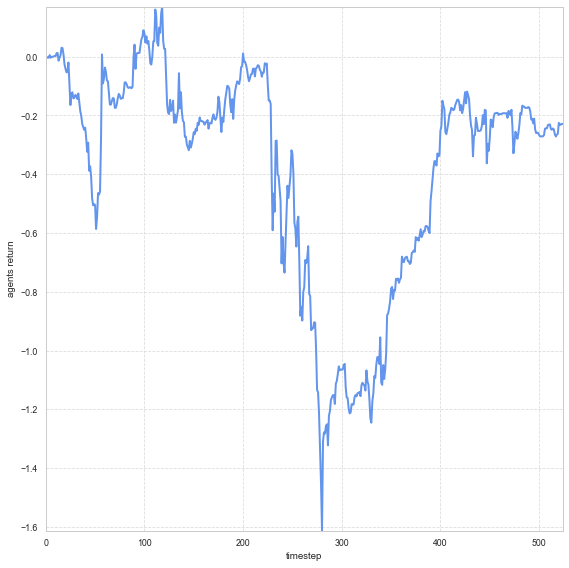

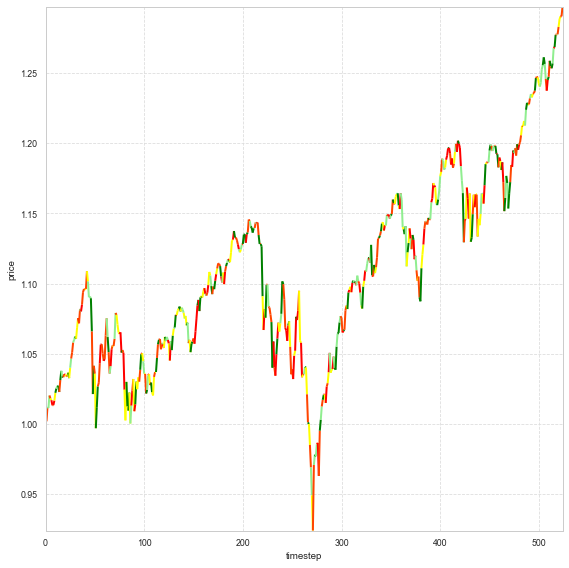

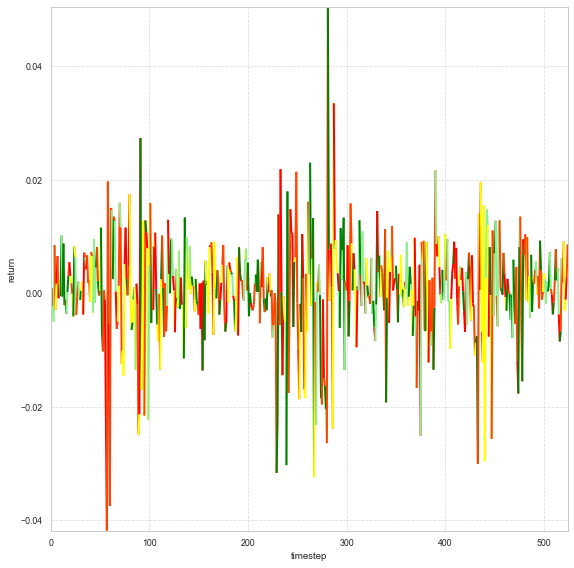

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


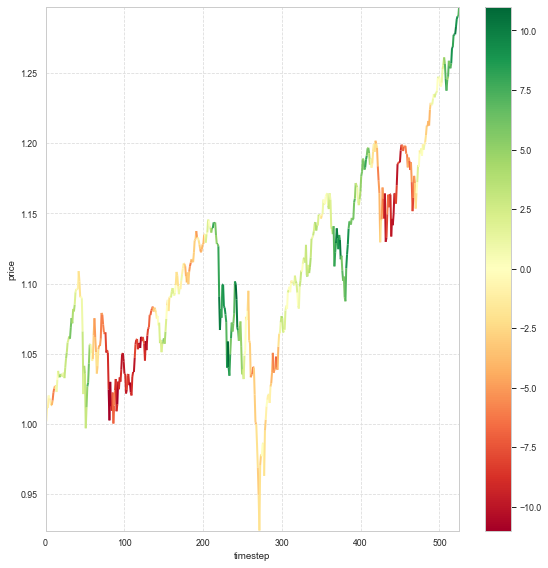

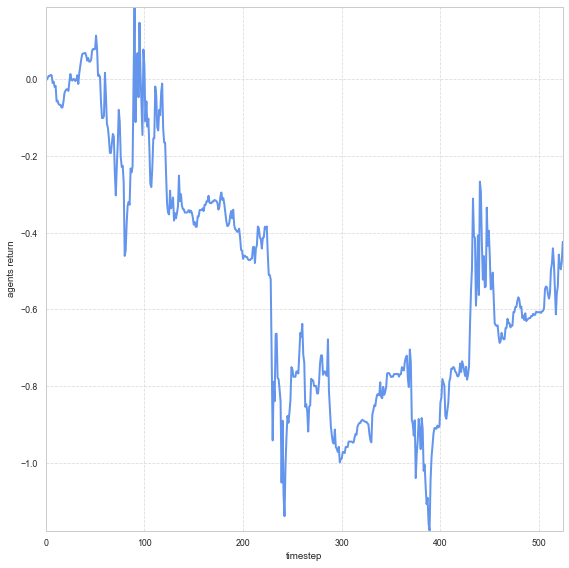

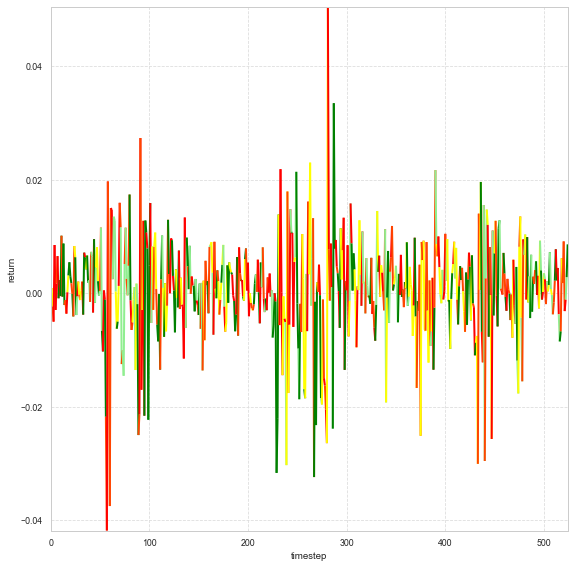

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


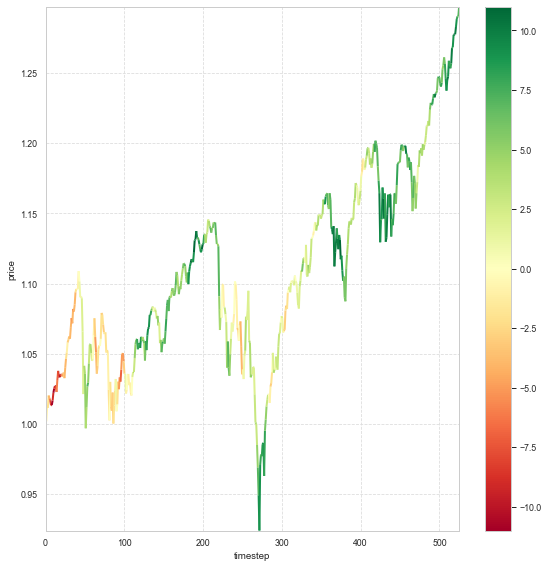

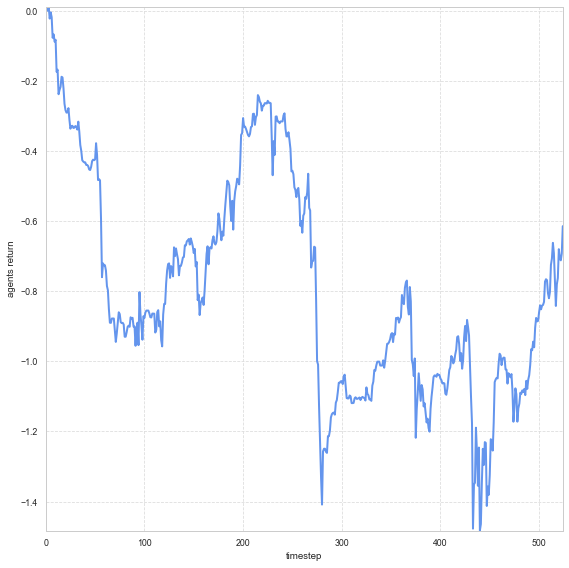

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


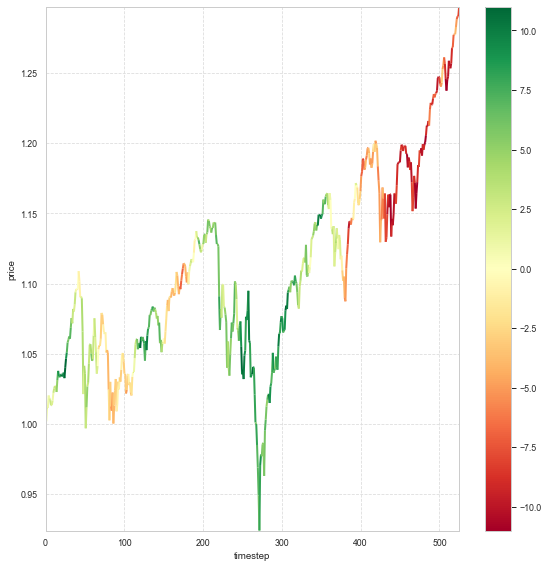

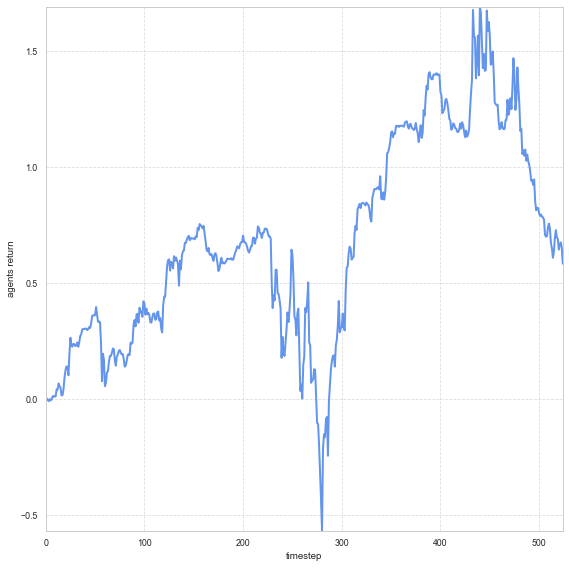

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


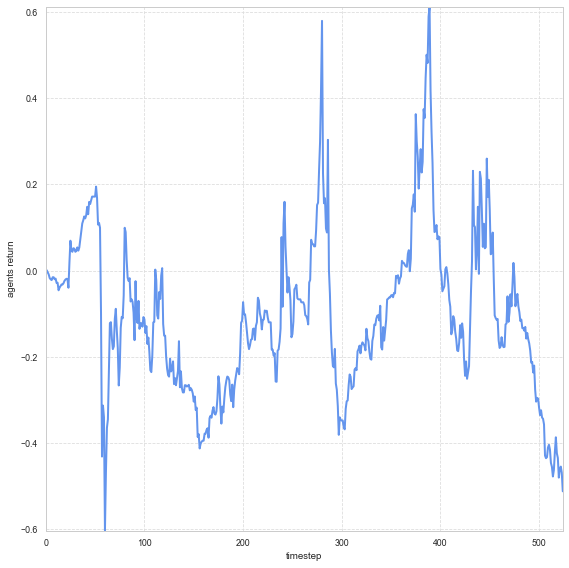

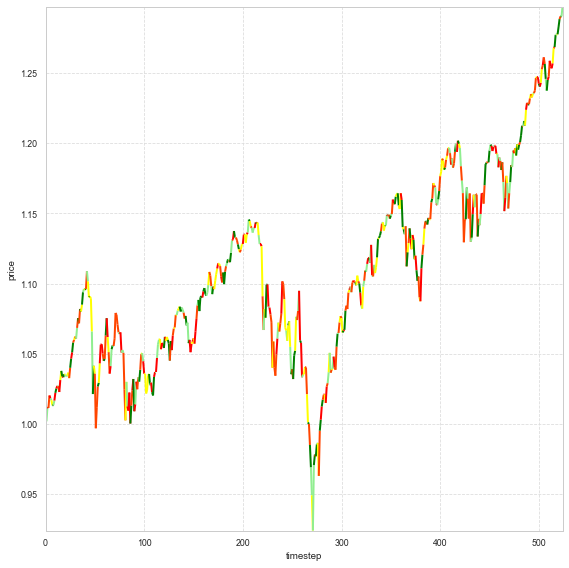

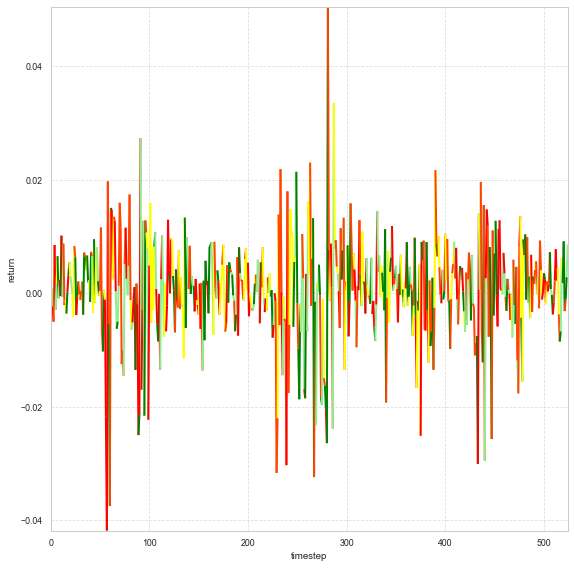

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


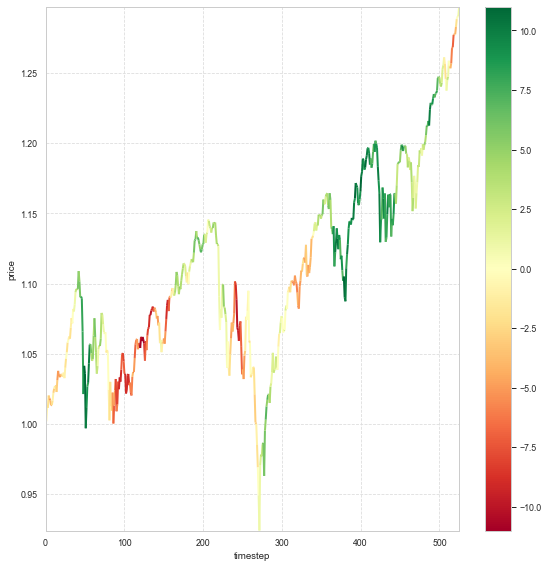

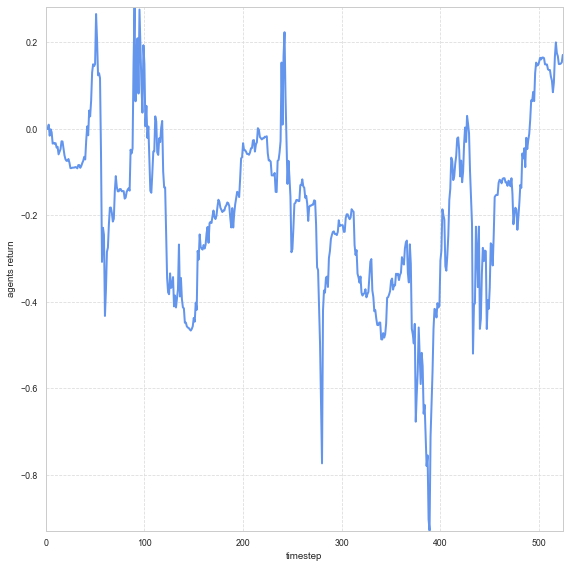

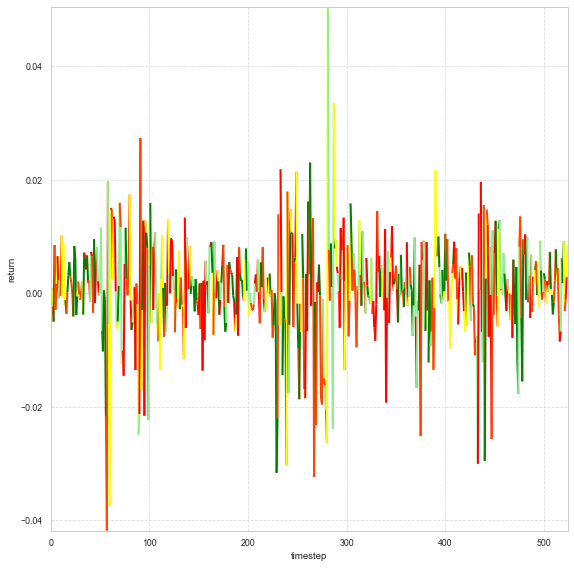

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


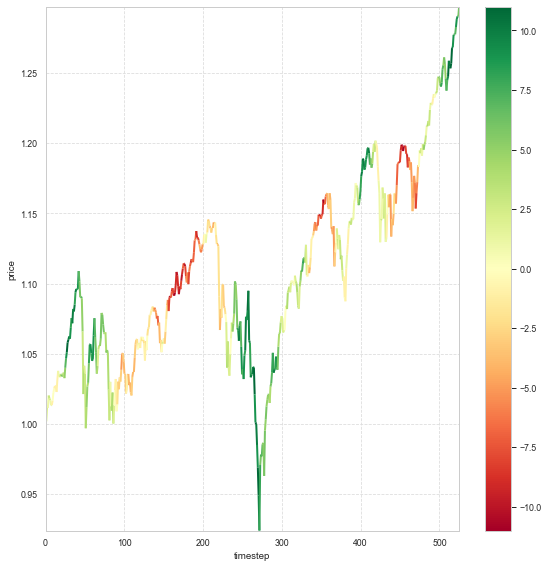

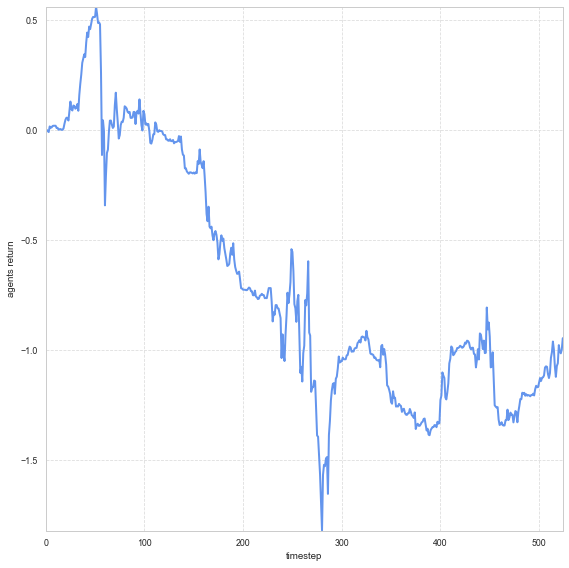

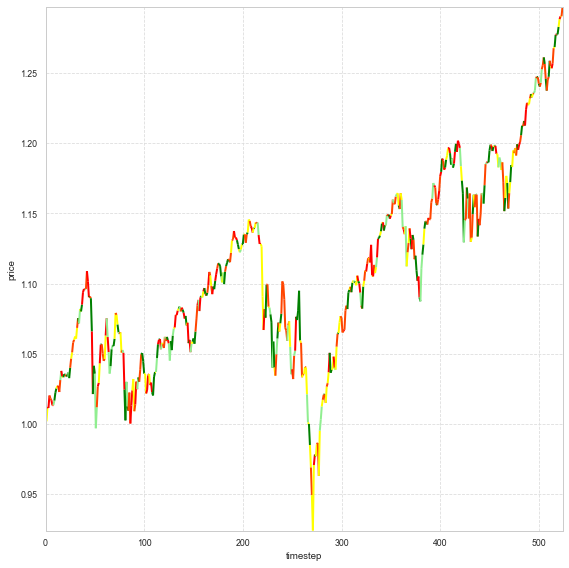

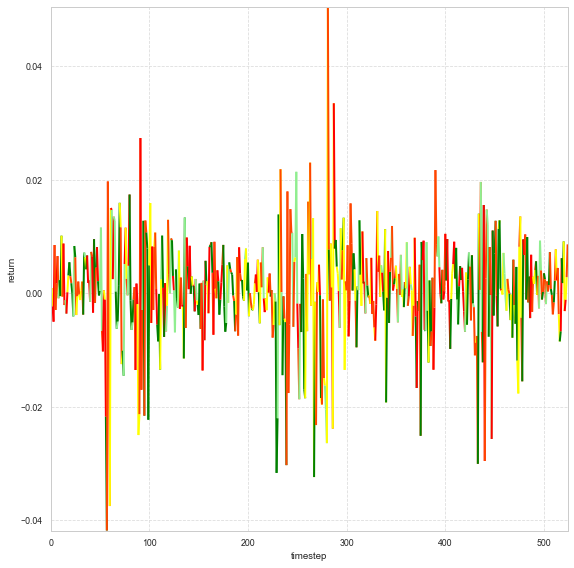

C:\Users\lucas\AppData\Local\Temp\ipykernel_11384\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


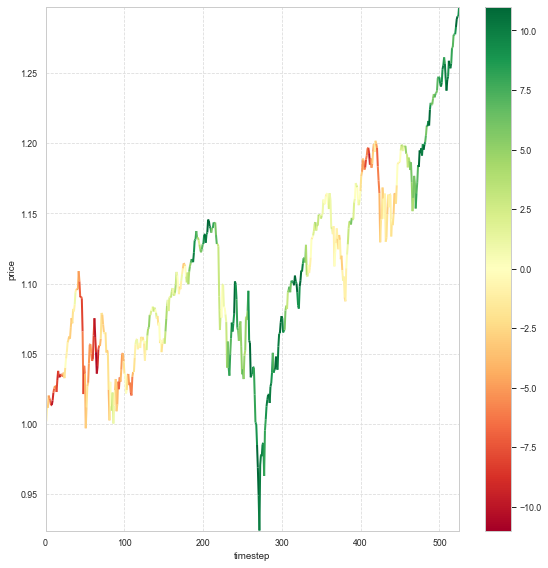

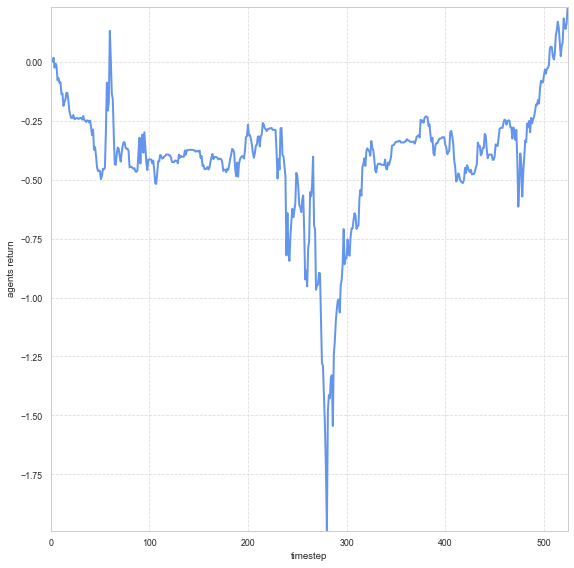

In [13]:
episode_list = [50, 100, 250, 500, 1000, 2000, 5000, 10000]
for i in range(len(episode_list)):
    position_plot(actions = action_episodes.iloc[:,i], price = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_act_price_plot.png", ylab = "price")
    position_plot(actions = action_episodes.iloc[:,i], price = return_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_act_return_plot.png", ylab = "return")
    color_plot(color_vals = position_size_episodes.iloc[:,i], y_vals = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_pos_plot.png")
    agent_returns = np.cumsum(position_size_episodes.iloc[:,i] * return_episodes.iloc[:,i])
    
    fig, axs = plt.subplots(1, figsize=(8, 8))
    fig.tight_layout()
    plt.plot(agent_returns)
    plt.xlabel("timestep")
    plt.ylabel("agents return")
    plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_agent_return.png", bbox_inches='tight')